In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Region_IVB_MIMAROPA.csv")

In [3]:
national = pd.read_csv("Family_Income_and_Expenditure.csv")

In [4]:
appliance_cols = [col for col in df.columns if "Number" in col]

# Compute total appliances owned per household
df["Total_Appliances"] = df[appliance_cols].sum(axis=1)

# Calculate correlation
correlation = df["Total Household Income"].corr(df["Total_Appliances"])

correlation

np.float64(0.6130693894796566)

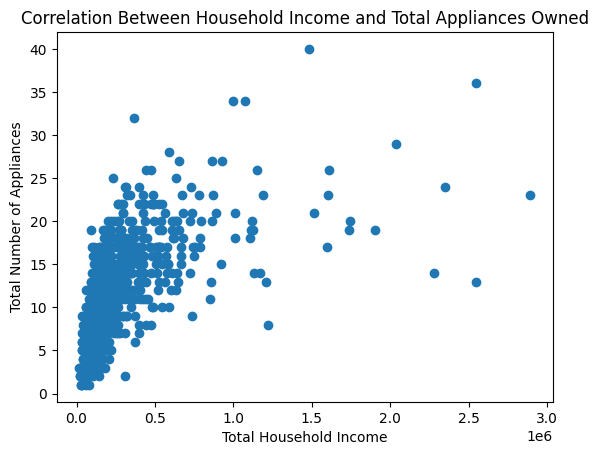

np.float64(0.6130693894796566)

In [5]:
plt.scatter(df["Total Household Income"], df["Total_Appliances"])
plt.xlabel("Total Household Income")
plt.ylabel("Total Number of Appliances")
plt.title("Correlation Between Household Income and Total Appliances Owned")
plt.show()
correlation

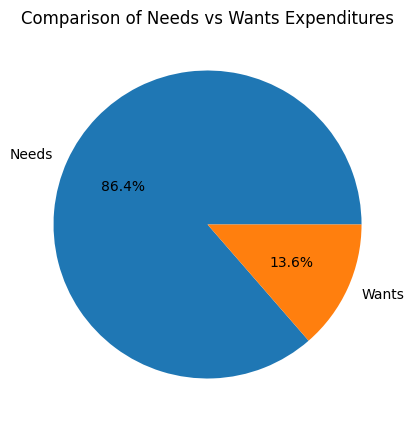

In [6]:
need_cols = [
    'Total Food Expenditure',
    'Total Rice Expenditure',
    'Bread and Cereals Expenditure',
    'Total Fish and  marine products Expenditure',
    'Vegetables Expenditure',
    'Meat Expenditure'
]

want_cols = [
    'Tobacco Expenditure',
    'Alcoholic Beverages Expenditure',
    'Restaurant and hotels Expenditure',
    'Miscellaneous Goods and Services Expenditure',
]

# Compute total averages
need_total = df[need_cols].mean().sum()
want_total = df[want_cols].mean().sum()

# Prepare pie chart
labels = ['Needs', 'Wants']
sizes = [need_total, want_total]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Comparison of Needs vs Wants Expenditures")
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Intercept: -95123.19169117432
Coefficient (Food Expenditure): 4.406543552770909
R-squared: 0.48593804441608757


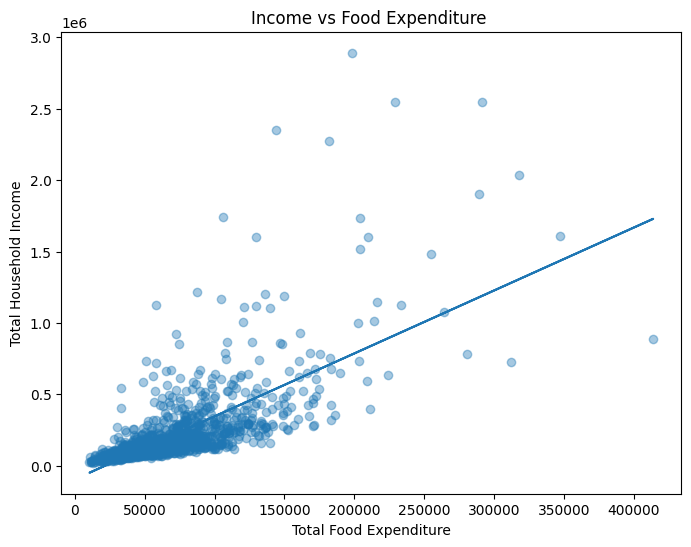

In [8]:
X = df[['Total Food Expenditure']]      # 2D for sklearn
y = df['Total Household Income']

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Get results
coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)
print(f"Intercept: {intercept}")
print(f"Coefficient (Food Expenditure): {coef}")
print(f"R-squared: {r2}")

# Plot regression
plt.figure(figsize=(8,6))
plt.scatter(df['Total Food Expenditure'], df['Total Household Income'], alpha=0.4)
plt.plot(df['Total Food Expenditure'], model.predict(X))
plt.xlabel("Total Food Expenditure")
plt.ylabel("Total Household Income")
plt.title("Income vs Food Expenditure ")
plt.show()

Essay Insight on the Relationship Between Food Expenditure and Household Income

Based on the data and the regression graph, we can see that total food expenditure is closely linked to total household income. In general, households that spend more on food also tend to have higher incomes. This makes sense because families with more money are able to allocate a larger budget for food, buy better-quality items, or purchase food more frequently.

The regression results show that for every one peso increase in food spending, household income increases by about four pesos on average. This tells us that food spending is a useful indicator of a household’s economic status. However, it is not a perfect predictor. The R-squared value of around 0.49 means that food expenditure explains almost half of the differences in income levels. The other half is influenced by other factors such as education, employment type, assets, family size, and other living expenses.

The graph also shows a few households with very high income compared to the rest. These points are far away from the main cluster and suggest that some households earn much more than others, even if their food spending is not extremely high. This indicates inequality in the region, where a small number of families earn significantly more than the majority.

Overall, the analysis suggests that food expenditure is a helpful but incomplete way to predict household income. It provides a clear general trend, but income is still shaped by many other important factors.

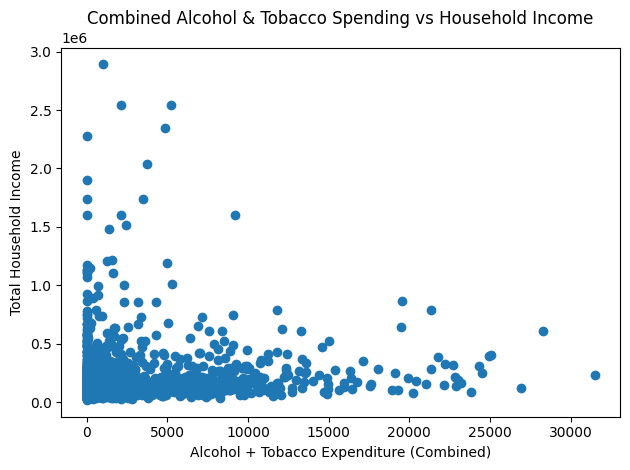

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


income_col = "Total Household Income"

# Detect alcohol and tobacco columns
alcohol_cols = [c for c in df.columns if "alcohol" in c.lower()]
tobacco_cols = [c for c in df.columns if "tobacco" in c.lower() or "cigar" in c.lower()]

alcohol_col = alcohol_cols[0] if alcohol_cols else None
tobacco_col = tobacco_cols[0] if tobacco_cols else None

# Combine alcohol + tobacco spending
df["Alcohol_Tobacco_Total"] = df[[alcohol_col, tobacco_col]].sum(axis=1)

# Plot combined scatter
plt.figure()
plt.scatter(df["Alcohol_Tobacco_Total"], df[income_col])
plt.xlabel("Alcohol + Tobacco Expenditure (Combined)")
plt.ylabel("Total Household Income")
plt.title("Combined Alcohol & Tobacco Spending vs Household Income")
plt.tight_layout()
plt.show()


The graph shows that households with higher alcohol and tobacco spending do not necessarily have higher incomes. Most households—regardless of income level—spend relatively small amounts on alcohol and tobacco. As alcohol and tobacco spending increases, household income does not show a clear upward trend. Instead, the points are widely scattered, suggesting weak or no strong relationship between combined alcohol/tobacco spending and total household income.